In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving test.csv to test (2).csv
Saving train.csv to train (2).csv
User uploaded file "test.csv" with length 28629 bytes
User uploaded file "train.csv" with length 61194 bytes


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline


In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
def bar_graph(feature):
  survived = train[train['Survived'] == 1][feature].value_counts()
  died = train[train['Survived'] == 0][feature].value_counts()
  data = pd.DataFrame([survived, died])
  data.index = ['survived', 'died']
  data.plot(kind = 'bar', stacked = True, figsize = (10,5) )


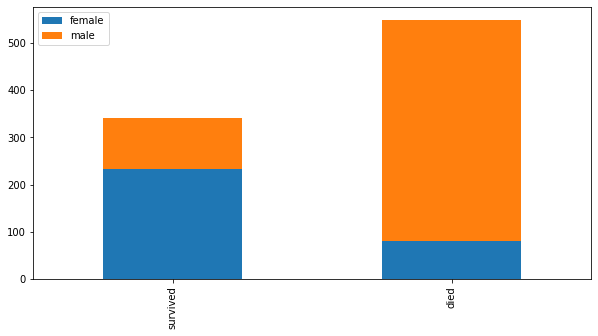

In [7]:
bar_graph('Sex')

In [0]:
train_test = [train,test]

In [0]:
for dataset in train_test:
  dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand = False)

In [10]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Capt          1
Sir           1
Jonkheer      1
Countess      1
Don           1
Lady          1
Mme           1
Ms            1
Name: Title, dtype: int64

In [0]:
title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Dr' : 4, 'Rev':5, 'Col': 6, 'Mlle': 7, 'Major':8, 'Don': 9, 'Sir': 10, 'Capt' :11, "Countess": 12, 'Mme': 13, 'Ms': 14, 'Jonkheer':15, 'Lady':16}

In [0]:
for dataset in train_test:
  dataset['Title'] = dataset['Title'].map(title_mapping)


In [13]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.0


In [0]:
sex_mapping = {'male': 0, 'female': 1}

In [0]:
for dataset in train_test:
  dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [0]:
train.drop(labels = 'Name', axis =1, inplace = True)


In [0]:

test.drop(labels = 'Name', axis =1, inplace =True)

In [18]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2.0


In [0]:

train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace = True )
test['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace = True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


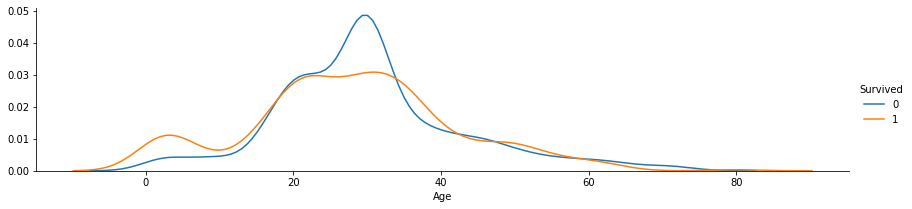

In [20]:
import seaborn as sns
facet = sns.FacetGrid(train, hue= 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age')
facet.add_legend()


In [0]:
for dataset in train_test:
  dataset.loc[dataset['Age'] <= 14, 'Age'] = 0
  dataset.loc[(dataset['Age'] > 14) & (dataset['Age']<= 30), "Age"] = 1
  dataset.loc[(dataset['Age'] >30) & (dataset['Age'] <= 50), 'Age'] = 2
  dataset.loc[dataset['Age'] > 50, 'Age'] = 3
  


In [0]:
for dataset in train_test:
  dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [0]:
embark_mapping = {'S':0, 'C':1, 'Q':2}
for dataset in train_test:
  dataset['Embarked'] = dataset['Embarked'].map(embark_mapping)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


In [0]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace = True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace = True)

In [26]:
train['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [0]:
for dataset in train_test:
  dataset.loc[dataset['Fare'] <= 25, 'Fare'] = 0,
  dataset.loc[(dataset['Fare']> 25)&(dataset['Fare']<=50), 'Fare'] = 1,
  dataset.loc[(dataset['Fare']>50)&(dataset['Fare'] <=100), 'Fare'] = 2,
  dataset.loc[dataset['Fare'] > 100, 'Fare'] = 3
              

In [0]:
for dataset in train_test:
  dataset['Cabin'] = dataset['Cabin'].str[:1]

In [29]:
train['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [0]:
cabin_mapping = {'A':0, 'B':0.4, 'C':0.8, 'D':1.2, 'E':1.6, 'F':2.0, 'G':2.4, 'T': 2.8}
for dataset in train_test:
  dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [0]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace = True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace = True)

In [32]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,0.0,2.0,2,0.0
1,893,3,1,2.0,1,0,363272,0.0,2.0,0,2.0
2,894,2,0,3.0,0,0,240276,0.0,2.0,2,0.0
3,895,3,0,1.0,0,0,315154,0.0,2.0,0,0.0
4,896,3,1,1.0,1,1,3101298,0.0,2.0,0,2.0


In [0]:
train['Family'] = train['SibSp'] + train['Parch'] + 1
test['Family'] = test['SibSp'] + test['Parch'] + 1

In [0]:
family_mapping = {1:0,2:0.4,3:0.8,4:1.2,5:1.6,6:2.0,7:2.4,8:2.8,9:3.2,10:3.6,11:4.0}
for dataset in train_test:
  dataset['Family'] = dataset['Family'].map(family_mapping)

In [0]:
drop = ['PassengerId', 'SibSp', 'Parch', 'Ticket', 'Title']
train.drop(drop, axis = 1, inplace = True)

In [0]:
test_data = test.drop(drop, axis = 1)

In [37]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   Fare      418 non-null    float64
 4   Cabin     418 non-null    float64
 5   Embarked  418 non-null    int64  
 6   Family    418 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 23.0 KB


In [0]:

train_Y = train['Survived'].values

In [0]:
train_X = train.drop('Survived', axis = 1).values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(train_X, train_Y, test_size = 0.1)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
model = Sequential()

In [44]:
X_train.shape

(801, 7)

In [0]:
model.add(Dense(9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 7))
model.add(Dense(9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [46]:
model.fit(X_train,Y_train, batch_size = 32, epochs = 300, validation_data= (X_test,Y_test))

Epoch 1/300
26/26 [==============================] - 0s 10ms/step - loss: 0.6917 - accuracy: 0.6192 - val_loss: 0.6909 - val_accuracy: 0.5889
Epoch 2/300
26/26 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.6192 - val_loss: 0.6887 - val_accuracy: 0.5889
Epoch 3/300
26/26 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.6192 - val_loss: 0.6856 - val_accuracy: 0.5889
Epoch 4/300
26/26 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.6192 - val_loss: 0.6796 - val_accuracy: 0.5889
Epoch 5/300
26/26 [==============================] - 0s 3ms/step - loss: 0.6684 - accuracy: 0.6192 - val_loss: 0.6675 - val_accuracy: 0.5889
Epoch 6/300
26/26 [==============================] - 0s 3ms/step - loss: 0.6557 - accuracy: 0.6192 - val_loss: 0.6564 - val_accuracy: 0.5889
Epoch 7/300
26/26 [==============================] - 0s 3ms/step - loss: 0.6388 - accuracy: 0.6192 - val_loss: 0.6380 - val_accuracy: 0.5889
Epoch 8/300


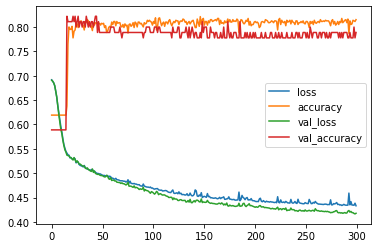

In [47]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [48]:
t = test_data.values
t.shape

(418, 7)

In [0]:
pred = model.predict(t)



In [50]:
pred = (pred > 0.5).astype(int).reshape(t.shape[0])

pred.shape


(418,)

In [0]:
test['prediction'] = pred
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': test['prediction']})

In [52]:

submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [0]:
submission.to_csv('submission.csv', index= False)

In [0]:
from google.colab import files
files.download('submission.csv')

In [0]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [0]:
SVC = SVC()
RFC = RandomForestClassifier(n_estimators=100)
DTC = DecisionTreeClassifier()

In [58]:
SVC.fit(X_train, Y_train)
RFC.fit(X_train, Y_train)
DTC.fit(X_train,Y_train)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
p_SVC = SVC.predict(t)
p_RFC = RFC.predict(t)
p_DTC = DTC.predict(t)


In [0]:
submission1 =pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived': p_SVC } )
submission2 =pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived': p_RFC } )
submission3 =pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived': p_DTC } )

In [0]:
submission1.to_csv('submission1.csv', index = False)
submission2.to_csv('submission2.csv', index = False)
submission3.to_csv('submission3.csv', index = False)

In [0]:
from google.colab import files
files.download('submission1.csv')
files.download('submission2.csv')
files.download('submission3.csv')